# Lecture 6: Visualization
ENVR 890-001: Python for Environmental Research, Fall 2020

September 25, 2020

By Andrew Hamilton. 

### Summary
No matter what type of research you do (lab experiments, public surveys, computer modeling, etc.), data visualization is a crucial skill. Programming languages like Python give us a high degree of flexibility and allow us to tailor our visualization to the data at hand. Today we will learn the basics of how to set up figures, and then go through many examples of different types of plots and customizations.

### The Basics
The main plotting package for Python is ``matplotlib``, and its ``pyplot`` module, which is typically imported with the alias ``plt``. Another helpful library which we will use later in the lecture is ``seaborn``, typically imported as ``sns``

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## adjust default plot font size
matplotlib.rcParams.update({'font.size': 18})

The most important arguments to any plotting function are the data. For our first example, let's plot two simple parabolas.

In [3]:
def parabola(a, b, c, x):
    return a + b * x + c * x **2

X = np.arange(-10, 10)
X

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [4]:
Y1 = [parabola(-2, 0, 1, x) for x in X]
Y2 = [parabola(5, -2, -0.5, x) for x in X]
Y2

[-25.0,
 -17.5,
 -11.0,
 -5.5,
 -1.0,
 2.5,
 5.0,
 6.5,
 7.0,
 6.5,
 5.0,
 2.5,
 -1.0,
 -5.5,
 -11.0,
 -17.5,
 -25.0,
 -33.5,
 -43.0,
 -53.5]

Now let's plot these two y variables over the domain of x.

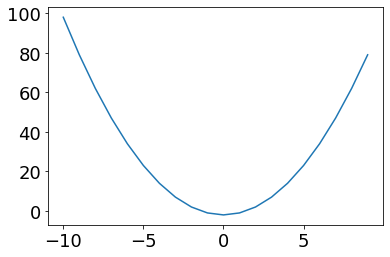

In [5]:
### plot Y1
plt.plot(X, Y1)

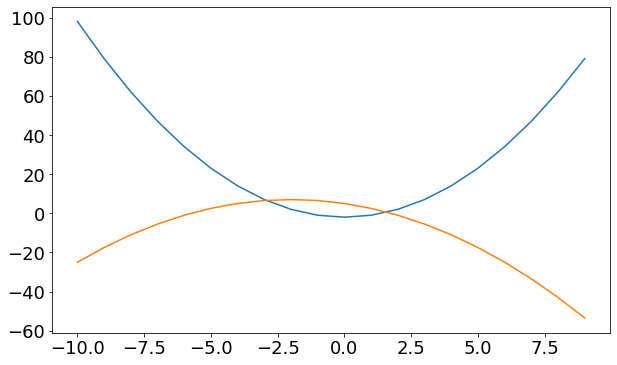

In [6]:
### plot Y1 & Y2 together, and fix figure size
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1)
plt.plot(X, Y2)

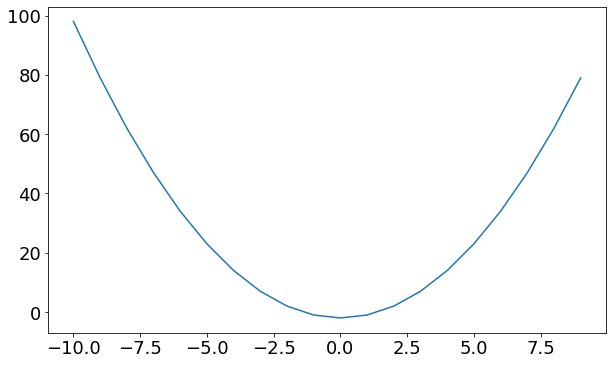

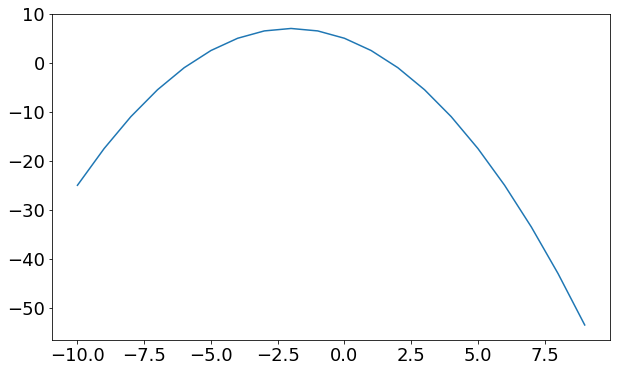

In [7]:
### plot Y1 & Y2 separately from 1 cell
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1)
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y2)

Now let's add some custom x and y labels, as well as a legend.

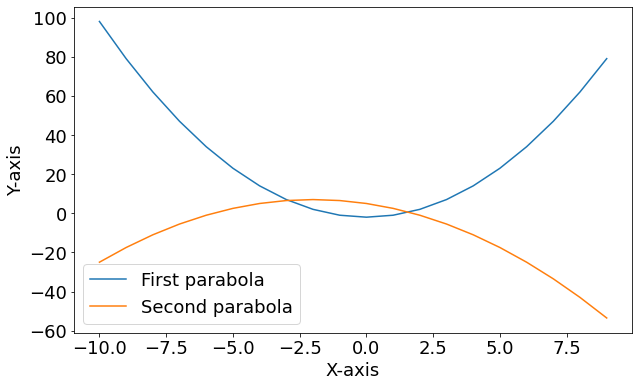

In [8]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1, label='First parabola')
plt.plot(X, Y2, label='Second parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

We can also customize the line's color, style, thickness, transparency, etc., and change the legend location. Many more [colors here](https://matplotlib.org/3.3.0/gallery/color/named_colors.html), and other options for [plot here](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html).

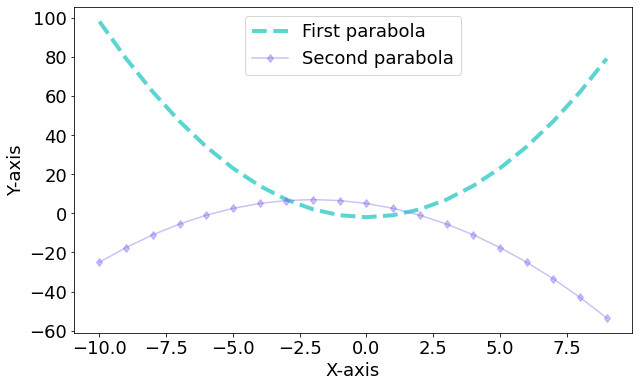

In [9]:
fig = plt.figure(figsize = (10, 6))
plt.plot(X, Y1, label='First parabola', color='mediumturquoise', linestyle='--', linewidth=4, alpha=0.9)
plt.plot(X, Y2, label='Second parabola', color='mediumslateblue', marker='d', alpha=0.4)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='upper center')

### In-class exercise
Let's create some fake data to represent annual snowfall in two locations, one colder and one warmer.
1. Create an x variable that includes the integers from 1920 to 2020.
1. Create one y variable that is random draws from an [exponential distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.exponential.html) with a scale parameter of 10, with the same length as x. (this is the colder climate)
1. Create a second y variable that is random draws from a [lognormal distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.lognormal.html) with a mean of 0.5 and a standard deviation of 1, with the same length as x. (this is the warmer climate)
1. Plot both time series. Label the x axis "Year" and the y axis "Annual snowfall (inches)". Create a legend where the first series is labeled "Colder" and the second is labeled "Warmer". Color them using colder and warmer-looking colors of your choice.

### Importing and cleaning real data
Let's read in some Chapel Hill weather data (from NOAA National Climate Data Center, https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00311677/detail)

In [10]:
### read in data. ignore first row ("header") where I have written info about where data was downloaded.
df = pd.read_csv('chapel_hill_weather.csv', header = 1)
df

,STATION,NAME,DATE,PRCP,SNOW,TMAX,TMIN
0,USC00311677,"CHAPEL HILL 2 W, NC US",1/1/1920,0.00,0.0,67.0,46.0
1,USC00311677,"CHAPEL HILL 2 W, NC US",1/2/1920,0.00,0.0,60.0,22.0
2,USC00311677,"CHAPEL HILL 2 W, NC US",1/3/1920,0.00,0.0,30.0,12.0
3,USC00311677,"CHAPEL HILL 2 W, NC US",1/4/1920,0.00,0.0,36.0,18.0
4,USC00311677,"CHAPEL HILL 2 W, NC US",1/5/1920,0.00,0.0,34.0,9.0
...,...,...,...,...,...,...,...
36318,USC00311677,"CHAPEL HILL 2 W, NC US",7/30/2020,2.00,0.0,90.0,69.0
36319,USC00311677,"CHAPEL HILL 2 W, NC US",7/31/2020,0.03,0.0,88.0,70.0
36320,USC00311677,"CHAPEL HILL 2 W, NC US",8/1/2020,0.00,NaN,93.0,74.0
36321,USC00311677,"CHAPEL HILL 2 W, NC US",8/2/2020,0.00,NaN,93.0,74.0


In [11]:
### Organize data
## rename columns
df.columns = ['station', 'name', 'date', 'precip', 'snow', 'tmax', 'tmin']
df

,station,name,date,precip,snow,tmax,tmin
0,USC00311677,"CHAPEL HILL 2 W, NC US",1/1/1920,0.00,0.0,67.0,46.0
1,USC00311677,"CHAPEL HILL 2 W, NC US",1/2/1920,0.00,0.0,60.0,22.0
2,USC00311677,"CHAPEL HILL 2 W, NC US",1/3/1920,0.00,0.0,30.0,12.0
3,USC00311677,"CHAPEL HILL 2 W, NC US",1/4/1920,0.00,0.0,36.0,18.0
4,USC00311677,"CHAPEL HILL 2 W, NC US",1/5/1920,0.00,0.0,34.0,9.0
...,...,...,...,...,...,...,...
36318,USC00311677,"CHAPEL HILL 2 W, NC US",7/30/2020,2.00,0.0,90.0,69.0
36319,USC00311677,"CHAPEL HILL 2 W, NC US",7/31/2020,0.03,0.0,88.0,70.0
36320,USC00311677,"CHAPEL HILL 2 W, NC US",8/1/2020,0.00,NaN,93.0,74.0
36321,USC00311677,"CHAPEL HILL 2 W, NC US",8/2/2020,0.00,NaN,93.0,74.0


In [12]:
## convert date column to datetime type
df.date = pd.to_datetime(df['date'])
df

,station,name,date,precip,snow,tmax,tmin
0,USC00311677,"CHAPEL HILL 2 W, NC US",1920-01-01,0.00,0.0,67.0,46.0
1,USC00311677,"CHAPEL HILL 2 W, NC US",1920-01-02,0.00,0.0,60.0,22.0
2,USC00311677,"CHAPEL HILL 2 W, NC US",1920-01-03,0.00,0.0,30.0,12.0
3,USC00311677,"CHAPEL HILL 2 W, NC US",1920-01-04,0.00,0.0,36.0,18.0
4,USC00311677,"CHAPEL HILL 2 W, NC US",1920-01-05,0.00,0.0,34.0,9.0
...,...,...,...,...,...,...,...
36318,USC00311677,"CHAPEL HILL 2 W, NC US",2020-07-30,2.00,0.0,90.0,69.0
36319,USC00311677,"CHAPEL HILL 2 W, NC US",2020-07-31,0.03,0.0,88.0,70.0
36320,USC00311677,"CHAPEL HILL 2 W, NC US",2020-08-01,0.00,NaN,93.0,74.0
36321,USC00311677,"CHAPEL HILL 2 W, NC US",2020-08-02,0.00,NaN,93.0,74.0


In [13]:
# index by date
df.index = df['date']
# remove unnecessary columns
df = df.loc[:, ['precip', 'snow', 'tmax', 'tmin']]
df

,precip,snow,tmax,tmin
date,,,,
1920-01-01,0.00,0.0,67.0,46.0
1920-01-02,0.00,0.0,60.0,22.0
1920-01-03,0.00,0.0,30.0,12.0
1920-01-04,0.00,0.0,36.0,18.0
1920-01-05,0.00,0.0,34.0,9.0
...,...,...,...,...
2020-07-30,2.00,0.0,90.0,69.0
2020-07-31,0.03,0.0,88.0,70.0
2020-08-01,0.00,NaN,93.0,74.0


In [14]:
## Get year, month, day for each
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df

,precip,snow,tmax,tmin,year,month,day
date,,,,,,,
1920-01-01,0.00,0.0,67.0,46.0,1920,1,1
1920-01-02,0.00,0.0,60.0,22.0,1920,1,2
1920-01-03,0.00,0.0,30.0,12.0,1920,1,3
1920-01-04,0.00,0.0,36.0,18.0,1920,1,4
1920-01-05,0.00,0.0,34.0,9.0,1920,1,5
...,...,...,...,...,...,...,...
2020-07-30,2.00,0.0,90.0,69.0,2020,7,30
2020-07-31,0.03,0.0,88.0,70.0,2020,7,31
2020-08-01,0.00,NaN,93.0,74.0,2020,8,1


In [15]:
## Only keep data since 1970
df = df.loc[df['year'] >= 1970, :]
df

,precip,snow,tmax,tmin,year,month,day
date,,,,,,,
1970-01-01,0.10,NaN,61.0,35.0,1970,1,1
1970-01-02,0.09,NaN,38.0,23.0,1970,1,2
1970-01-03,0.00,NaN,37.0,25.0,1970,1,3
1970-01-04,0.00,NaN,49.0,23.0,1970,1,4
1970-01-05,0.00,NaN,41.0,17.0,1970,1,5
...,...,...,...,...,...,...,...
2020-07-30,2.00,0.0,90.0,69.0,2020,7,30
2020-07-31,0.03,0.0,88.0,70.0,2020,7,31
2020-08-01,0.00,NaN,93.0,74.0,2020,8,1


In [16]:
### Clean data
# remove NANs by assuming previous value (note, this is not the most sophisticated way to fill data)
nrows = df.shape[0]
ncols = df.shape[1]
np.isnan(df)

,precip,snow,tmax,tmin,year,month,day
date,,,,,,,
1970-01-01,False,True,False,False,False,False,False
1970-01-02,False,True,False,False,False,False,False
1970-01-03,False,True,False,False,False,False,False
1970-01-04,False,True,False,False,False,False,False
1970-01-05,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
2020-07-30,False,False,False,False,False,False,False
2020-07-31,False,False,False,False,False,False,False
2020-08-01,False,True,False,False,False,False,False


In [17]:
print("Fraction of nan's before:")
print(np.isnan(df).sum(axis=0) / nrows)
print()

Fraction of nan's before:
precip    0.003088
snow      0.124173
tmax      0.005293
tmin      0.008602
year      0.000000
month     0.000000
day       0.000000
dtype: float64



In [18]:
### replace nan's with previous value in time
for i in range(nrows):
    for j in range(ncols):
        if np.isnan(df.iloc[i, j]):
            df.iloc[i, j] = df.iloc[i - 1, j]
            
print("Fraction of nan's after:")
print(np.isnan(df).sum(axis=0) / nrows)

/home/andrew/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fraction of nan's after:
precip    0.0
snow      0.0
tmax      0.0
tmin      0.0
year      0.0
month     0.0
day       0.0
dtype: float64


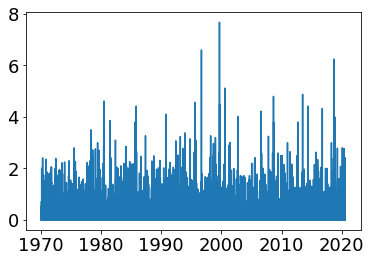

In [19]:
### Plot data as time series
plt.plot(df.precip)

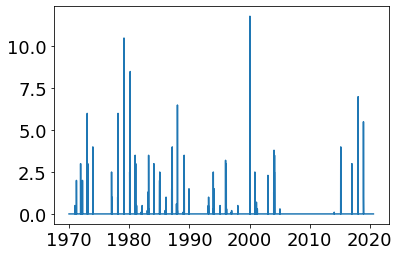

In [20]:
plt.plot(df.snow)

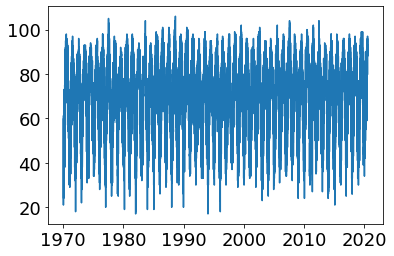

In [21]:
plt.plot(df.tmax)

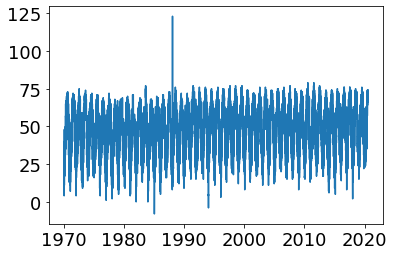

In [22]:
plt.plot(df.tmin)

In [23]:
## Looks like a bad data value - tmin probably wasn't >120 in January
df.loc[df.tmin > 100, :]

,precip,snow,tmax,tmin,year,month,day
date,,,,,,,
1988-01-27,0.0,0.0,31.0,123.0,1988,1,27


In [24]:
## Let's look at that data in context of neighbors
i = np.argmax(df.tmin)
print(i)
df.iloc[(i - 2):(i + 3), :]

6474


,precip,snow,tmax,tmin,year,month,day
date,,,,,,,
1988-01-25,0.05,0.0,56.0,24.0,1988,1,25
1988-01-26,0.42,0.0,43.0,23.0,1988,1,26
1988-01-27,0.00,0.0,31.0,123.0,1988,1,27
1988-01-28,0.00,0.0,36.0,13.0,1988,1,28
1988-01-29,0.00,0.0,45.0,14.0,1988,1,29


In [25]:
## Let's reset that value based on previous value (note: you could also do average, or leave blank)
df.iloc[i, 3] = df.iloc[i - 1, 3]
df.iloc[(i - 2):(i + 3), :]
### Note: this particular warning about "setting a value based on a copy of a slice" occurs a lot, personally I ignore it

/home/andrew/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,precip,snow,tmax,tmin,year,month,day
date,,,,,,,
1988-01-25,0.05,0.0,56.0,24.0,1988,1,25
1988-01-26,0.42,0.0,43.0,23.0,1988,1,26
1988-01-27,0.00,0.0,31.0,23.0,1988,1,27
1988-01-28,0.00,0.0,36.0,13.0,1988,1,28
1988-01-29,0.00,0.0,45.0,14.0,1988,1,29


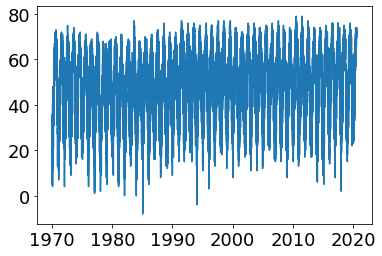

In [26]:
plt.plot(df.tmin)

### Many ways to visualize

In [27]:
## Function for plotting time series over period
def plot_weather(df, colname, ylabel, startyear=df.year.min(), endyear=df.year.max()):
    data = df.loc[(df['year'] >= startyear) & (df['year'] <= endyear), colname]
    fig = plt.figure(figsize = (12,8))
    plt.plot(data)
    plt.xlabel('Year')
    plt.ylabel(ylabel)

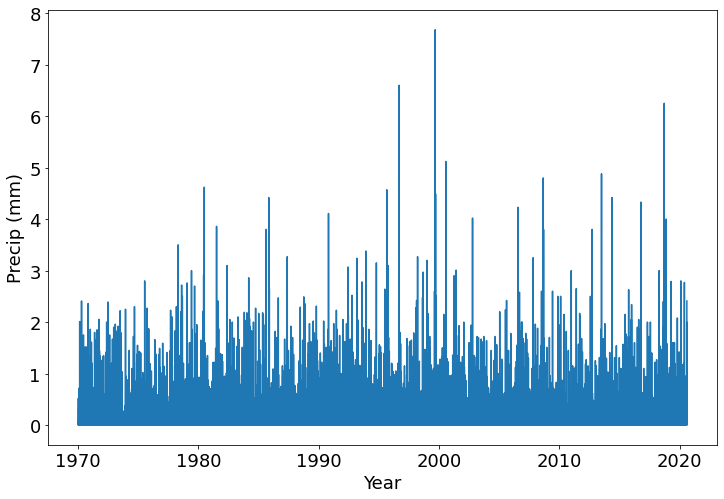

In [28]:
plot_weather(df, 'precip', 'Precip (mm)')

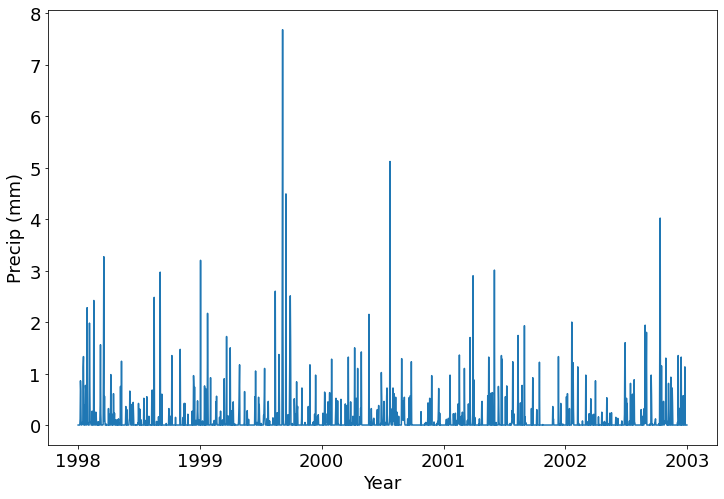

In [29]:
plot_weather(df, 'precip', 'Precip (mm)', 1998, 2002)

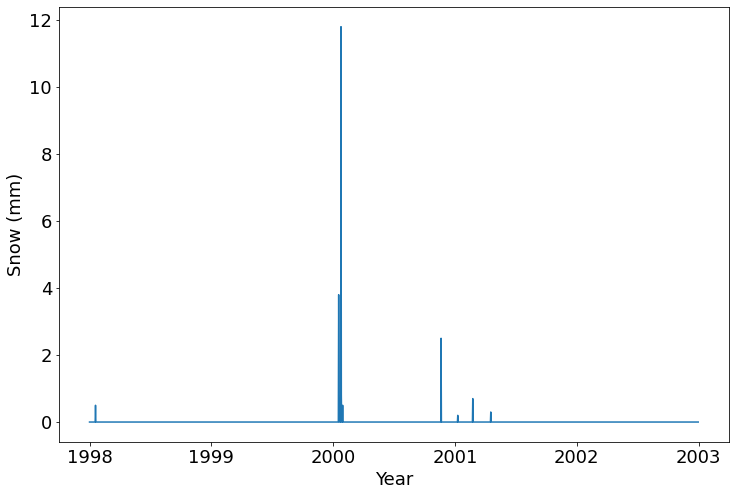

In [30]:
plot_weather(df, 'snow', 'Snow (mm)', 1998, 2002)

In [31]:
## Function for plotting multiple time series over period
def plot_weather_multi(df, colnames, ylabel, startyear=df.year.min(), endyear=df.year.max()):
    data = df.loc[(df['year'] >= startyear) & (df['year'] <= endyear)]
    fig = plt.figure(figsize = (12,8))
    for colname in colnames:
        plt.plot(data[colname], label=colname)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend()

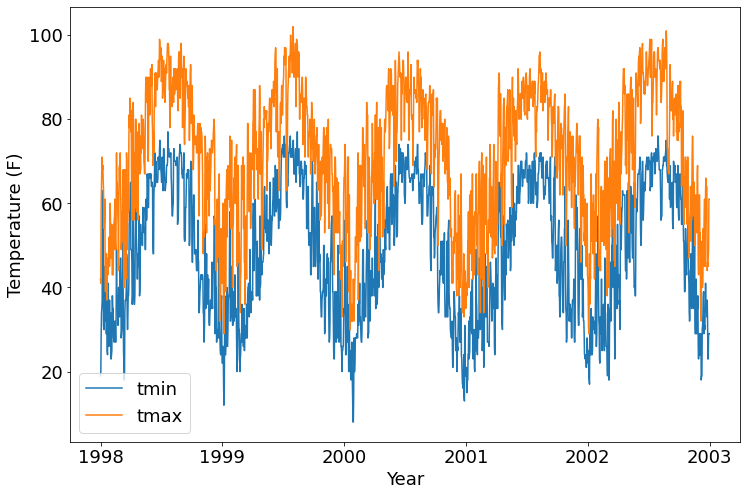

In [32]:
plot_weather_multi(df, ['tmin', 'tmax'], 'Temperature (F)', 1998, 2002)

Text(0, 0.5, 'tmax')

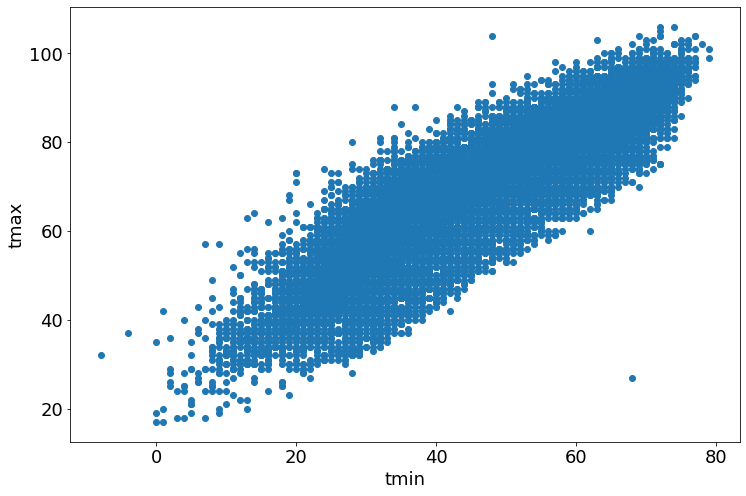

In [33]:
## How do min and max temperatures compare? Scatterplot.
fig = plt.figure(figsize = (12,8))
plt.scatter(df['tmin'], df['tmax'])
plt.xlabel('tmin')
plt.ylabel('tmax')

Text(0, 0.5, 'tmax')

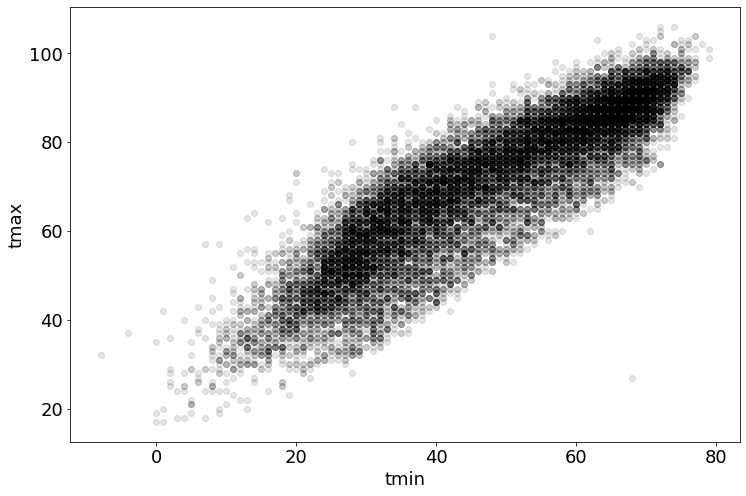

In [34]:
## customizing with color and transparency
fig = plt.figure(figsize = (12,8))
plt.scatter(df['tmin'], df['tmax'], color='k', alpha=0.1)
plt.xlabel('tmin')
plt.ylabel('tmax')

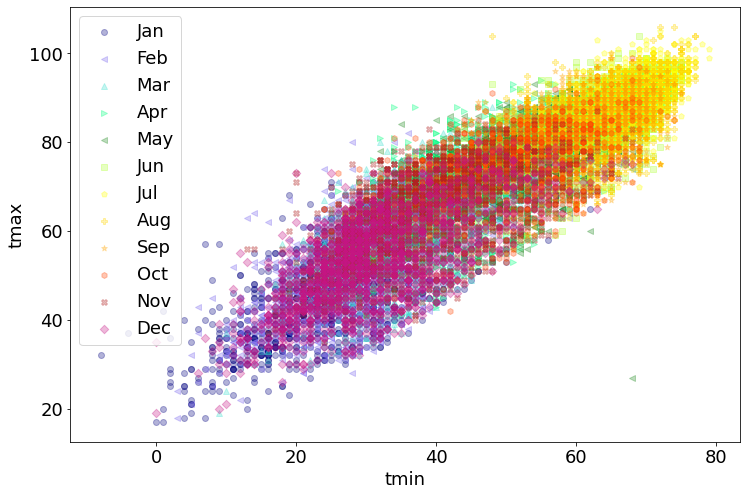

In [35]:
## what about scattering by month?
markers = ['o', '<', '^', '>', '<', 's', 'p', 'P', '*', 'h', 'X', 'D']
colors = ['navy', 'mediumslateblue', 'turquoise', 'springgreen', 'forestgreen', 'greenyellow', 'yellow', 'gold', 'orange', 'orangered', 'firebrick', 'mediumvioletred']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize = (12,8))
for i in range(12):
    data = df.loc[df['month'] == (i+1), :]
    plt.scatter(data['tmin'], data['tmax'], color=colors[i], marker=markers[i], alpha=0.3, label=months[i])
plt.xlabel('tmin')
plt.ylabel('tmax')
plt.legend()

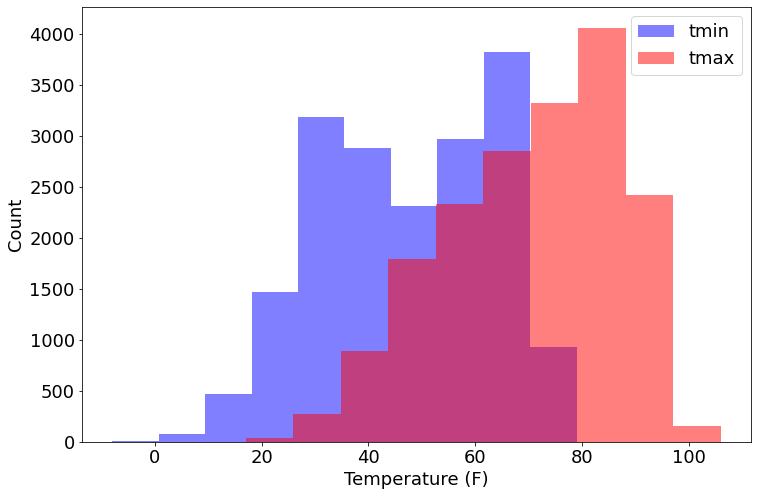

In [36]:
## histogram of tmin vs tmax
fig = plt.figure(figsize = (12,8))
plt.hist(df['tmin'], color='b', alpha=0.5, label='tmin')
plt.hist(df['tmax'], color='r', alpha=0.5, label='tmax')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.legend()

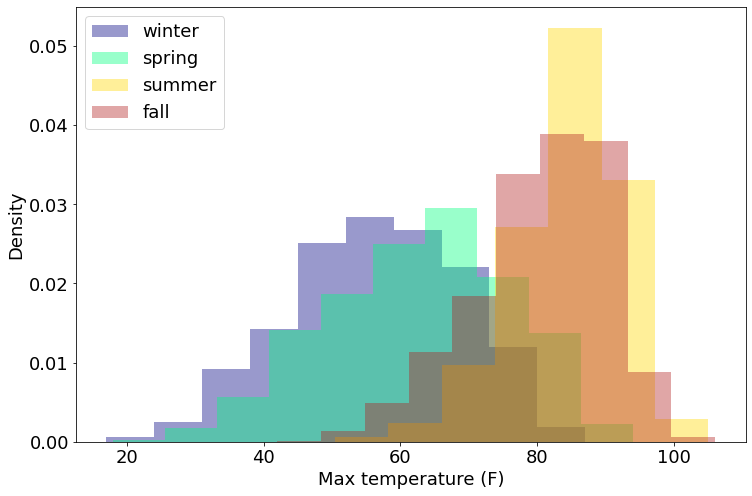

In [37]:
## histogram of tmax by season. Use "density" to make sure all have equal area.
seasons = ['winter', 'spring', 'summer', 'fall']
season_months =  {'winter': [0, 1, 11],
           'spring': [2, 3, 4],
           'summer': [5, 6, 7],
           'fall': [8, 9, 10]}
colors = {'winter': 'navy', 
          'spring': 'springgreen',
          'summer': 'gold',
          'fall': 'firebrick'}

fig = plt.figure(figsize = (12,8))
for k in seasons:
    is_season = [m in season_months[k] for m in df['month']]
    data = df.loc[is_season, :]
    plt.hist(data['tmax'], color=colors[k], density=True, alpha=0.4, label=k)
plt.xlabel('Max temperature (F)')
plt.ylabel('Density')
plt.legend()

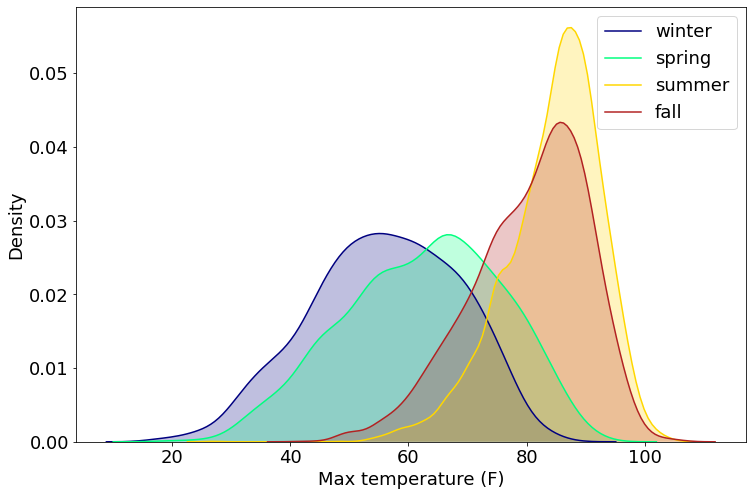

In [38]:
##### seaborn is another plotting package with some nice clean functions. plays nice with matplotlib parameters.
## kde plot
fig = plt.figure(figsize = (12,8))
for k in seasons:
    is_season = [m in season_months[k] for m in df['month']]
    data = df.loc[is_season, :]
    sns.kdeplot(data['tmax'], color=colors[k], shade=True, label=k)
plt.xlabel('Max temperature (F)')
plt.ylabel('Density')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

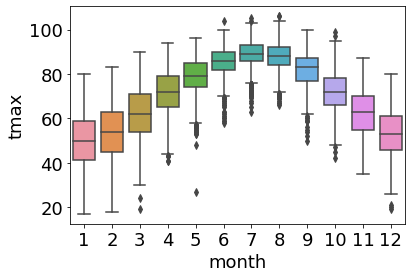

In [39]:
## boxplots
sns.boxplot(x = df['month'], y = df['tmax'])
plt.legend

Text(0, 0.5, 'Max temperature (F)')

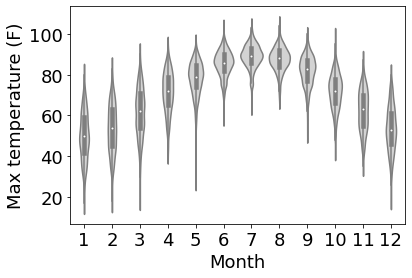

In [40]:
## violin plots
## alternatively with seaborn, can just write colnames. We can also specify tick labels.
sns.violinplot(x = 'month', y = 'tmax', data = df, color = 'lightgrey')
plt.xlabel('Month')
plt.ylabel('Max temperature (F)')

In [41]:
## Grouping data using the "groupby" function
df_monthly_mean = df.groupby('month').mean()
df_monthly_mean

,precip,snow,tmax,tmin,year,day
month,,,,,,
1,0.123146,0.068539,49.871091,27.924059,1994.804084,15.987237
2,0.123305,0.062246,53.745263,30.096842,1994.759298,14.602807
3,0.143085,0.022141,61.744681,37.311170,1995.553191,15.997340
4,0.114395,0.000395,71.622368,45.698026,1994.853289,15.508553
5,0.136257,0.000000,78.370443,54.657552,1995.227214,16.026042
6,0.142921,0.000000,85.472848,62.853642,1994.707947,15.507947
7,0.139035,0.000000,89.059425,66.854313,1994.824920,15.980831
8,0.150769,0.000000,87.603048,65.821074,1994.677270,15.968191
9,0.151400,0.000000,81.950202,59.720054,1994.292059,15.485868


Text(0, 0.5, 'Temperature (F)')

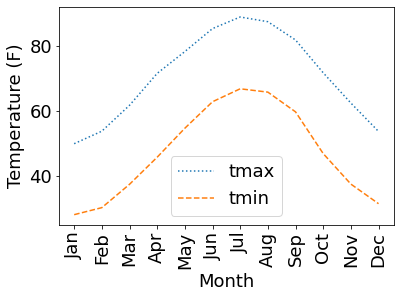

In [42]:
## plot by month with different line styles. Also replace x label ticks.
plt.plot(df_monthly_mean['tmax'], ls = ':', label='tmax')
plt.plot(df_monthly_mean['tmin'], ls = '--', label='tmin')
plt.legend()
ticks = plt.xticks(list(range(1, 13)), months, rotation=90)
plt.xlabel('Month')
plt.ylabel('Temperature (F)')

In [43]:
df_annual_sum = df.groupby('year').sum()
df_annual_sum

,precip,snow,tmax,tmin,month,day
year,,,,,,
1970,44.05,0.5,25739.0,17330.0,2382,5738
1971,52.99,5.5,25424.0,17555.0,2382,5738
1972,52.48,2.5,25135.0,17296.0,2384,5767
1973,37.87,13.0,23830.0,16147.0,2289,5242
1974,36.89,0.0,23428.0,15357.0,2227,5242
1975,51.23,0.0,25942.0,16864.0,2382,5738
1976,33.61,0.0,25681.0,16062.0,2384,5767
1977,37.60,3.5,25715.0,16095.0,2382,5738
1978,54.49,7.5,25024.0,15316.0,2382,5738


<AxesSubplot:xlabel='year', ylabel='precip'>

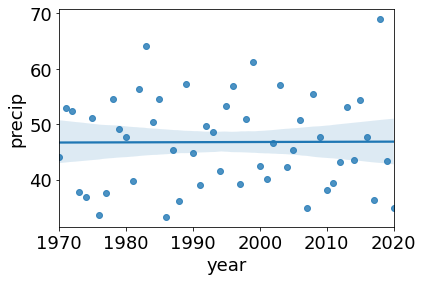

In [44]:
## Regression plot (we will cover regression in more detail next week)
sns.regplot(df_annual_sum.index, df_annual_sum['precip'], ci=90)

In [45]:
## Stacking multiple plots
df_annual_max = df.groupby('year').max()
df_annual_min = df.groupby('year').min()
df_annual_selected = df_annual_max[['tmax']]
df_annual_selected['tmin'] = df_annual_min[['tmin']]
df_annual_selected.columns = ['tmax_max', 'tmin_min']
df_annual_selected

/home/andrew/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,tmax_max,tmin_min
year,,
1970,98.0,4.0
1971,97.0,7.0
1972,96.0,4.0
1973,93.0,9.0
1974,94.0,17.0
1975,96.0,9.0
1976,98.0,4.0
1977,105.0,1.0
1978,97.0,2.0


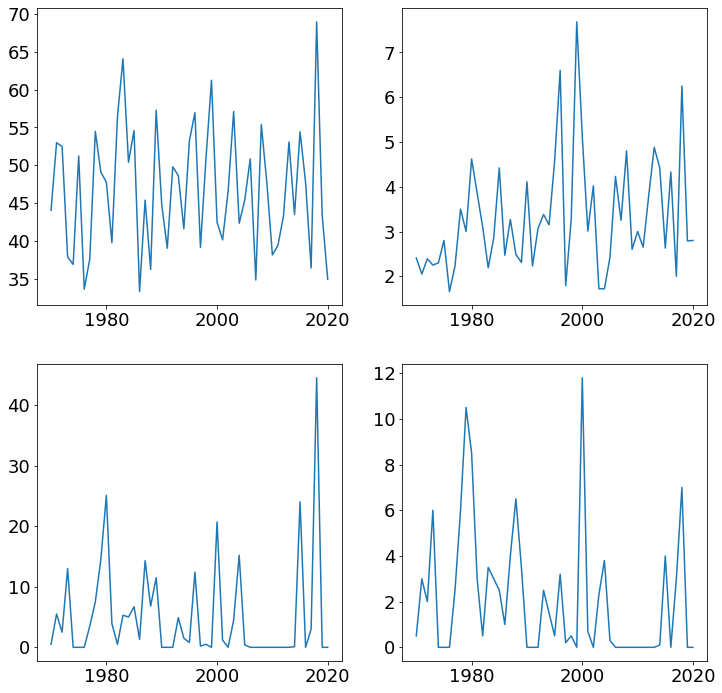

In [46]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = (12, 12))
ax11.plot(df_annual_sum.index, df_annual_sum['precip'])
ax12.plot(df_annual_max.index, df_annual_max['precip'])
ax21.plot(df_annual_sum.index, df_annual_sum['snow'])
ax22.plot(df_annual_max.index, df_annual_max['snow'])

<AxesSubplot:xlabel='year', ylabel='snow'>

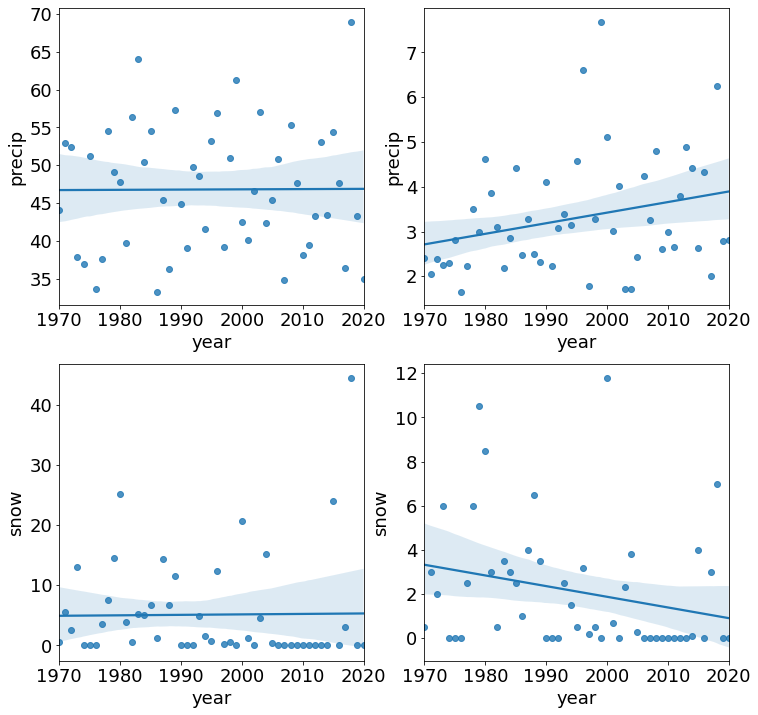

In [47]:
## subplots with seaborn
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = (12, 12))
sns.regplot(df_annual_sum.index, df_annual_sum['precip'], ax=ax11)
sns.regplot(df_annual_max.index, df_annual_max['precip'], ax=ax12)
sns.regplot(df_annual_sum.index, df_annual_sum['snow'], ax=ax21)
sns.regplot(df_annual_max.index, df_annual_max['snow'], ax=ax22)

Text(0.5, 0, '')

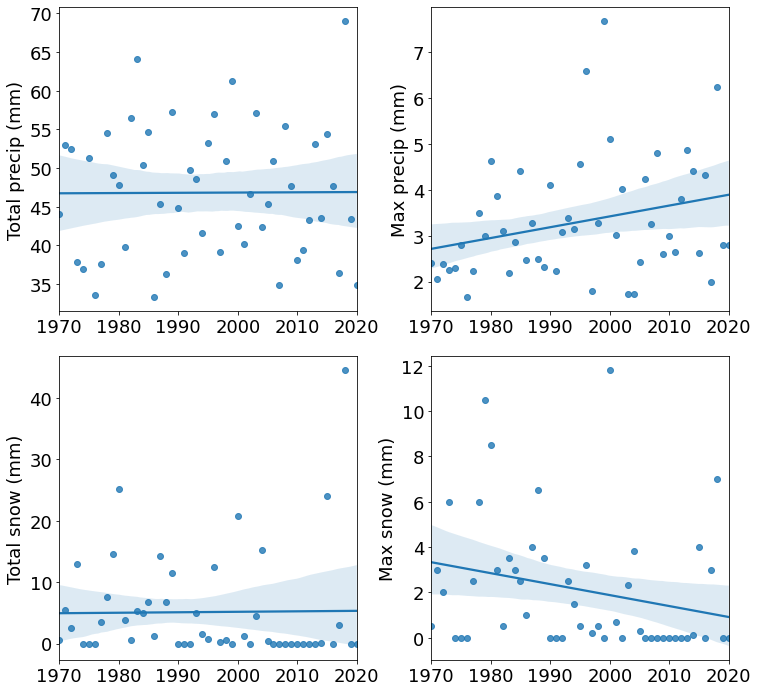

In [48]:
## Adjusting spacing of plot
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize = (12, 12))
fig.subplots_adjust(hspace=0.15, wspace=0.25)


sns.regplot(df_annual_sum.index, df_annual_sum['precip'], ax=ax11)
ax11.set_ylabel('Total precip (mm)')
ax11.set_xlabel('')
sns.regplot(df_annual_max.index, df_annual_max['precip'], ax=ax12)
ax12.set_ylabel('Max precip (mm)')
ax12.set_xlabel('')
sns.regplot(df_annual_sum.index, df_annual_sum['snow'], ax=ax21)
ax21.set_ylabel('Total snow (mm)')
ax21.set_xlabel('')
sns.regplot(df_annual_max.index, df_annual_max['snow'], ax=ax22)
ax22.set_ylabel('Max snow (mm)')
ax22.set_xlabel('')

In [49]:
## pairplot
df_annual_combined = df_annual_sum.loc[:, ['precip', 'snow']].copy()
columns = df_annual_combined.columns
columns = [c + '_sum' for c in columns]
df_annual_combined.columns = columns
df_annual_combined

,precip_sum,snow_sum
year,,
1970,44.05,0.5
1971,52.99,5.5
1972,52.48,2.5
1973,37.87,13.0
1974,36.89,0.0
1975,51.23,0.0
1976,33.61,0.0
1977,37.60,3.5
1978,54.49,7.5


In [50]:
for c in ['precip', 'snow']:
    df_annual_combined[c + '_max'] = df_annual_max[c]    
df_annual_combined

,precip_sum,snow_sum,precip_max,snow_max
year,,,,
1970,44.05,0.5,2.41,0.5
1971,52.99,5.5,2.05,3.0
1972,52.48,2.5,2.39,2.0
1973,37.87,13.0,2.25,6.0
1974,36.89,0.0,2.30,0.0
1975,51.23,0.0,2.80,0.0
1976,33.61,0.0,1.66,0.0
1977,37.60,3.5,2.23,2.5
1978,54.49,7.5,3.50,6.0


c1 + c2
c1 + c3
c1 + c4
c2 + c3
c2 + c4
c3 + c4

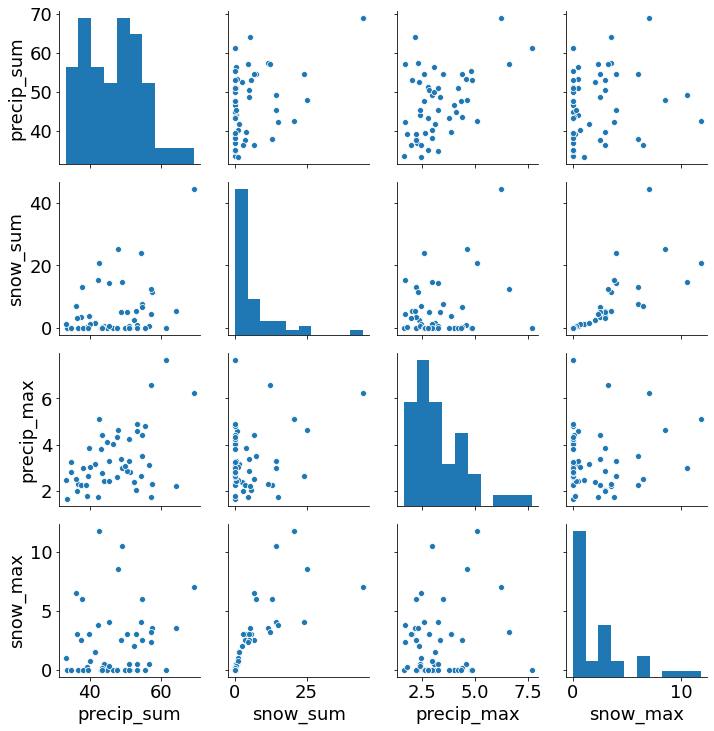

In [51]:
sns.pairplot(df_annual_combined)

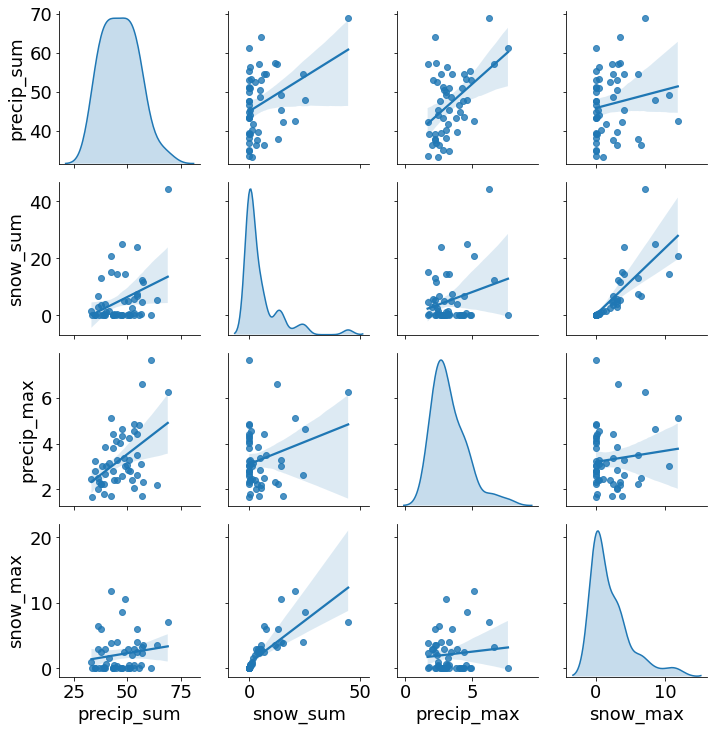

In [52]:
sns.pairplot(df_annual_combined, kind='reg', diag_kind='kde')

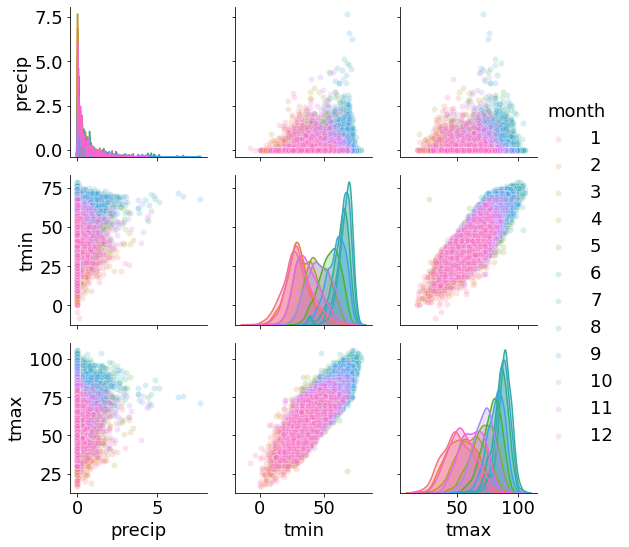

In [53]:
sns.pairplot(df, vars=['precip', 'tmin', 'tmax'], hue='month', plot_kws={'alpha': 0.2})

In [54]:
## what if we just want winter months?
winter_rows = [i for i in range(df.shape[0]) if df['month'].iloc[i] in [12, 1, 2]]

In [55]:
df_winter = df.iloc[winter_rows, :]
df_winter

,precip,snow,tmax,tmin,year,month,day
date,,,,,,,
1970-01-01,0.10,0.0,61.0,35.0,1970,1,1
1970-01-02,0.09,0.0,38.0,23.0,1970,1,2
1970-01-03,0.00,0.0,37.0,25.0,1970,1,3
1970-01-04,0.00,0.0,49.0,23.0,1970,1,4
1970-01-05,0.00,0.0,41.0,17.0,1970,1,5
...,...,...,...,...,...,...,...
2020-02-24,0.00,0.0,62.0,24.0,2020,2,24
2020-02-25,0.48,0.0,53.0,45.0,2020,2,25
2020-02-26,0.02,0.0,65.0,49.0,2020,2,26


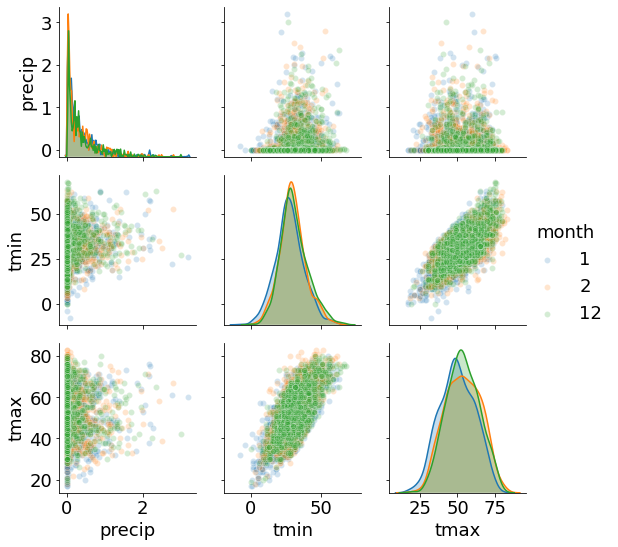

In [56]:
sns.pairplot(df_winter, vars=['precip', 'tmin', 'tmax'], hue='month', plot_kws={'alpha': 0.2})

Text(0, 0.5, 'Max Temperature (F)')

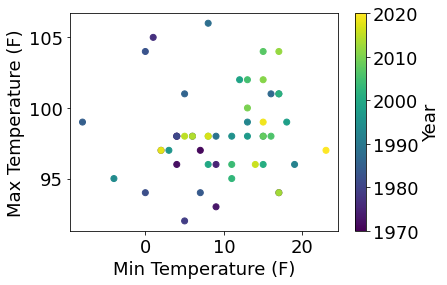

In [57]:
## Using colormaps
plt.scatter(df_annual_min['tmin'], df_annual_max['tmax'], c = df_annual_max.index, cmap = 'viridis')
cbar = plt.colorbar()
cbar.set_label('Year')
plt.xlabel('Min Temperature (F)')
plt.ylabel('Max Temperature (F)')

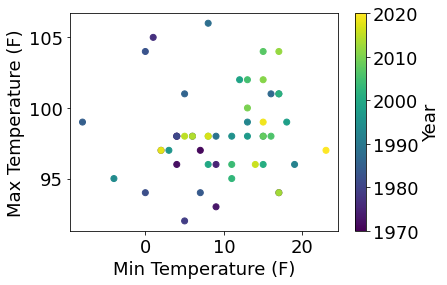

In [58]:
## Saving your figures
plt.scatter(df_annual_min['tmin'], df_annual_max['tmax'], c = df_annual_max.index, cmap = 'viridis')
cbar = plt.colorbar()
cbar.set_label('Year')
plt.xlabel('Min Temperature (F)')
plt.ylabel('Max Temperature (F)')

# save as png with 300 dpi resolution
plt.savefig('annual_min_vs_max_temp.png', bbox_inches='tight', dpi=300)

# save as eps vector format so you can edit in Illustrator
plt.savefig('annual_min_vs_max_temp.eps', bbox_inches='tight')